<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

In [39]:
def histograma(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
        return
    else:
        # Criação do histograma
        histo = np.zeros(256, dtype=int)
        altura_original, largura_original = imagem.shape
        for y in range(altura_original):
            for x in range(largura_original):
                valorint = imagem[y, x]
                histo[valorint] = histo[valorint] + 1

        # Parte para plotar o histograma e converter para OpenCV ---

        # Cria a figura e o gráfico com Matplotlib
        fig = plt.figure(figsize=(10, 5))
        plt.bar(range(256), histo, color='gray', width=1)
        plt.title("Histograma da Imagem")
        plt.xlabel("Nível de Cinza")
        plt.ylabel("Número de Pixels")
        plt.xlim([0, 256])

        # Renderiza o gráfico e obtém os dados do buffer
        fig.canvas.draw()

        # Usa buffer_rgba() para obter o array de pixels do gráfico
        imagem_plot_rgba = np.asarray(fig.canvas.buffer_rgba())

        # Fecha a figura do Matplotlib
        plt.close(fig)

        # Converte a ordem das cores de RGBA para BGR (OpenCV) e remove o canal alfa
        imagem_plot = cv2.cvtColor(imagem_plot_rgba, cv2.COLOR_RGBA2BGR)

        return imagem_plot



In [40]:
def equalizar_e_mostrar(imagem):
    if imagem is None:
        print(f"Erro: Não foi possível carregar a imagem.")
        return
    else:

      #Função do CV2 que ja equaliza o Histograma (Gerando nova imagem)
      imagem_equalizada = cv2.equalizeHist(imagem)


      fig, axs = plt.subplots(2, 2, figsize=(10, 10))
      plt.suptitle("Equalização de Histograma Otimizada", fontsize=16)

      # --- Visão Original ---

      # Imagem Original (Canto Superior Esquerdo)
      axs[0, 0].imshow(imagem, cmap='gray')
      axs[0, 0].set_title('A. Imagem Original')
      axs[0, 0].axis('off')

      # Histograma Original
      # cv2.calcHist é a forma otimizada de calcular o histograma
      hist_original = cv2.calcHist([imagem], [0], None, [256], [0, 256])
      axs[0, 1].plot(hist_original, color='black')
      axs[0, 1].set_title('B. Histograma Original')
      axs[0, 1].set_xlim([0, 256])
      axs[0, 1].set_xlabel('Nível de Cinza')
      axs[0, 1].set_ylabel('Frequência de Pixels')


      # --- Visão Equalizada ---

      # Imagem Equalizada (Canto Inferior Esquerdo)
      axs[1, 0].imshow(imagem_equalizada, cmap='gray')
      axs[1, 0].set_title('C. Imagem Equalizada')
      axs[1, 0].axis('off')

      # Histograma Equalizado (Canto Inferior Direito)
      hist_equalizado = cv2.calcHist([imagem_equalizada], [0], None, [256], [0, 256])
      axs[1, 1].plot(hist_equalizado, color='black')
      axs[1, 1].set_title('D. Histograma Equalizado')
      axs[1, 1].set_xlim([0, 256])
      axs[1, 1].set_xlabel('Nível de Cinza')
      axs[1, 1].set_ylabel('Frequência de Pixels')

      plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta layout para evitar sobreposição do título
      plt.show()


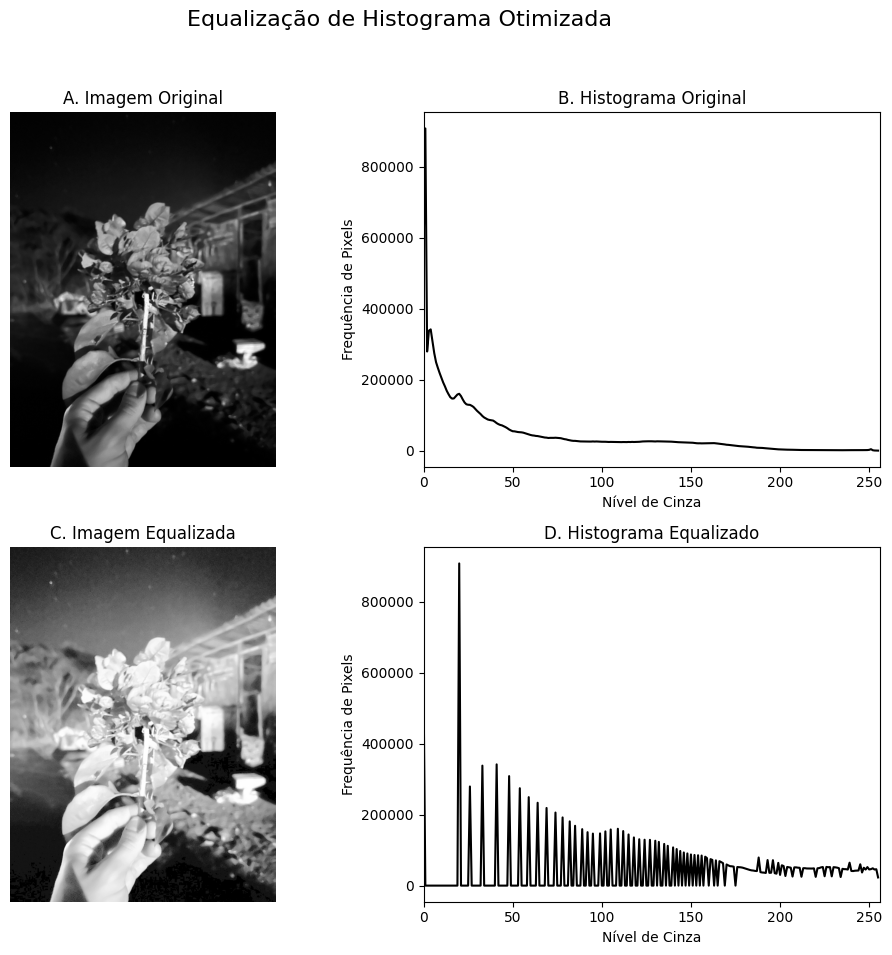

In [41]:
caminho_do_arquivo = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_o_n_5.jpeg'
#caminho_do_arquivo = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_o_d_5.jpeg'
#caminho_do_arquivo = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_n_5.jpeg'
#caminho_do_arquivo = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_d_5.jpeg'

imagem_original = cv2.imread(caminho_do_arquivo, cv2.COLOR_BGR2GRAY)

equalizar_e_mostrar(imagem_original)